### Ensemble 

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
from datetime import datetime
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn import svm
import scikitplot as skplt
from sklearn.svm import l1_min_c
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import scikitplot as skplt

In [2]:
# Reading training dataset
userhome = os.path.expanduser('~')
path = '/Documents/'
X_train = pd.read_csv(userhome + path + 'X_train_v2.csv')
Y_train = pd.read_csv(userhome + path + 'Y_train_v2.csv',header=None )

In [3]:
Y_train = Y_train.iloc[:,0]

In [6]:
Y_train.shape

(39321,)

In [5]:
#checking missing records
X_train.iloc[:,:].isnull().any()

year_2014                      False
year_2015                      False
item_category_Accessories      False
item_category_Battery          False
item_category_Books            False
item_category_Cinema           False
item_category_Game Consoles    False
item_category_Games            False
item_category_Gifts            False
item_category_Music            False
item_category_Office           False
item_category_Official         False
item_category_Programs         False
Item Type_Electronics          False
item_price_s                   False
item_cnt_month_s               False
Sales_vol_s                    False
dtype: bool

In [9]:
# ensemble of 3 models
clf1 = linear_model.LogisticRegression(C=0.003, penalty='l1')
clf2 = svm.SVC(C=100,kernel='linear',probability=True)
clf3 = linear_model.LogisticRegression(C=100, penalty='l1')


In [10]:
#using hard and soft voting
start = datetime.now()
eclf1 = VotingClassifier(estimators=[
         ('lr-lasso', clf1), ('svm', clf2), ('lr', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, Y_train)
print("This took1 ", datetime.now() - start)
print(eclf1.predict(X_train))

start = datetime.now()
eclf2 = VotingClassifier(estimators=[
         ('lr-lasso', clf1), ('svm', clf2), ('lr', clf3)],
        voting='soft')
eclf2 = eclf2.fit(X_train, Y_train)
print("This took2 ", datetime.now() - start)
print(eclf2.predict(X_train))

This took1  0:05:36.074379
[1 1 1 ..., 1 1 0]
This took2  0:10:21.078428
[1 1 1 ..., 1 1 0]


In [11]:
#reading test files
userhome = os.path.expanduser('~')
path = '/Documents/'
X_test = pd.read_csv(userhome + path + 'X_test_v2.csv')
Y_test = pd.read_csv(userhome + path + 'Y_test_v2.csv',header=None )

In [12]:
Y_test = Y_test.iloc[:,0]

In [13]:
#predicting hard and soft voting
Y_pred1 = eclf1.predict(X_test)
Y_pred2 = eclf2.predict(X_test)


In [14]:
# Accuracy of hard and soft voting
print('The accuracy of the svm classifier on training data is {:.2f} '.format(eclf1.score(X_test, Y_test)))
print('The accuracy of the svm classifier on training data is {:.2f} '.format(eclf2.score(X_test, Y_test)))

The accuracy of the svm classifier on training data is 0.86 
The accuracy of the svm classifier on training data is 0.86 


[[1747  892]
 [ 560 6981]]


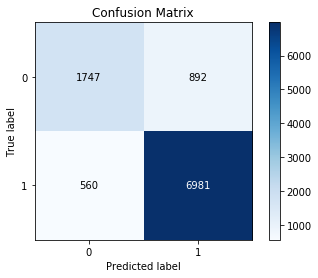

In [15]:
# Confusion matrix from hard voting
confusion_mat = confusion_matrix(Y_test,Y_pred1)
print(confusion_mat)
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred1, normalize=False)

[[1735  904]
 [ 535 7006]]


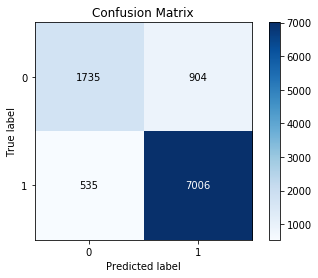

In [16]:
#Confusion Matrix from soft voting
confusion_mat = confusion_matrix(Y_test,Y_pred2)
print(confusion_mat)
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred2, normalize=False)

In [17]:
# Classification report from hard voting
print(classification_report(Y_test,Y_pred1))

             precision    recall  f1-score   support

          0       0.76      0.66      0.71      2639
          1       0.89      0.93      0.91      7541

avg / total       0.85      0.86      0.85     10180



In [18]:
# Classification report from soft voting
print(classification_report(Y_test,Y_pred2))

             precision    recall  f1-score   support

          0       0.76      0.66      0.71      2639
          1       0.89      0.93      0.91      7541

avg / total       0.85      0.86      0.86     10180



In [19]:
#Accuracy of hard voting
print(accuracy_score(Y_test,Y_pred1))

0.857367387033


In [20]:
#Accuracy of soft voting
print(accuracy_score(Y_test,Y_pred2))

0.858644400786
